In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [85]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF, FastICA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding


np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'
# pip install umap-learn
# pip install hdbscan
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False
    
# pip install umap-learn
umap_available = True
try:
    import umap
except ImportError:
    umap_available = False

In [57]:
df_base = pd.read_csv('to_train.csv')
df_wav = pd.read_csv('samples.csv')

In [58]:
df_base.head()

,name,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
0,george,-312.483826,157.413849,-83.389450,47.328335,47.099693,-55.105373,-13.754276,-17.003675,-52.974422,...,-24.018995,-43.016975,2.110411,-6.013774,-28.540850,-3.117069,-5.603108,-13.659479,-2.320226,-12.169437
1,george,-379.066345,165.666901,-57.867474,22.860203,25.974346,-46.115276,-14.100521,-26.140167,-52.515862,...,-19.969303,-40.412582,-2.325323,-6.705203,-25.866652,-7.142958,-10.470287,-16.260077,-5.955035,-14.368776
2,george,-424.772461,127.852097,-53.795578,17.831009,26.846817,-34.200123,-14.209099,-18.696369,-32.358147,...,-23.223995,-34.547401,-1.589133,-11.633971,-23.948620,-0.723396,-4.458993,-10.715401,-1.525208,-11.829735
3,george,-389.584808,166.073517,-79.408005,25.375334,32.479534,-50.722202,-10.692026,-17.150023,-45.109356,...,-23.147619,-41.559254,-0.668476,-12.243627,-26.992029,1.255178,-5.872051,-13.653750,-2.406699,-15.252200
4,george,-389.274689,169.632339,-77.210121,22.742558,36.415375,-46.292343,-13.345025,-17.793606,-43.902256,...,-21.835735,-41.768703,-1.458749,-10.668156,-28.250916,-1.996623,-7.960970,-16.239616,-3.517600,-17.073278


In [59]:
df_wav.head()

,File,Number,Name
0,0_george_0.wav,0,george
1,0_george_1.wav,0,george
2,0_george_10.wav,0,george
3,0_george_11.wav,0,george
4,0_george_12.wav,0,george


In [60]:
df_base.shape #df con los mfcc's de cada muestra
df_wav.shape #df con el nombre de arhivo y el nº que dice en la muestra
ext_col = df_wav[['File', 'Number']]
df_base = pd.concat([ext_col, df_base], axis=1)
df = df_base

In [61]:
X = df.drop(columns = ['name','File','Number'])
X_std = StandardScaler().fit_transform(X)
y = df['name']

In [72]:
labels = df['name'].values

(3000, 3)

In [65]:
def do_plot(X_fit, title=None, labels=None):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=[col])
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=[col])
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

In [66]:
tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(X)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Victor\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


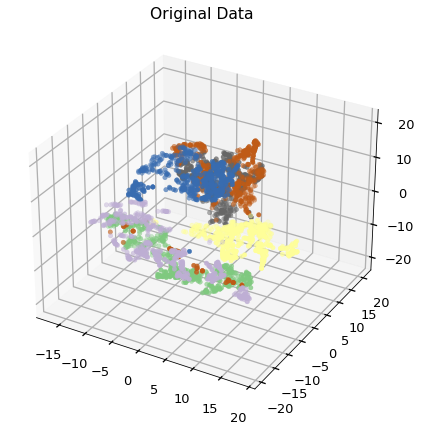

In [78]:
do_plot(X_reduced, 'MFCCs reduced with t-SNE', y)

In [102]:
X_reduced

X_red_df = pd.DataFrame(data = X_reduced,
                        columns = ['MMFC1','MMFC2','MMFC3',])
X_red_df = X_red_df.join(y)

In [103]:
X_red_df

,MMFC1,MMFC2,MMFC3,name
0,-0.746055,0.368791,-20.809650,george
1,-0.865749,-3.320672,-16.211618,george
2,1.749842,-5.534135,-14.154825,george
3,-0.162837,-2.254469,-15.438538,george
4,-0.214070,-2.306266,-15.402252,george
...,...,...,...,...
2995,-0.880281,9.907997,9.473100,yweweler
2996,3.041727,7.336787,8.496922,yweweler
2997,1.841412,8.619348,7.862397,yweweler
2998,-1.509247,11.333568,9.505751,yweweler


In [104]:
#https://plotly.com/python/3d-scatter-plots/
fig = px.scatter_3d(X_red_df, x='MMFC1', y='MMFC2', z='MMFC3', color='name')
fig.show()

In [92]:
X_reduced.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Victor\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


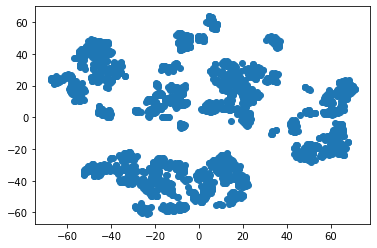

In [79]:
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(X)

tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'])
plt.show()

In [ ]:
# https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ejemplo-con-t-sne